## 1. Import block

In [1]:
import numpy as np
import pandas as pd
import scipy as scp
import sklearn
from PIL.ImageColor import colormap
from sklearn import metrics
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Assignment Activity 1: Linear regression using Python

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# function to sense check the uploaded or created dataframes
def sense_check(dataframe):
    print(dataframe.shape)
    print(dataframe.size)
    print(dataframe.isna().sum())

In [4]:
# Explore the data
sense_check(reviews)


(2000, 11)
22000
gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [5]:
# Basic descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Dataframe refinement

In [6]:
# Drop unnecessary columns.
reviews_clean = reviews.drop(columns=['language', 'platform'])

#renaming columns
reviews_clean.rename(columns={'remuneration (k£)':'renumeration',
                              'spending_score (1-100)':'spending_score'
                              }, inplace=True)
# View column names.
reviews_clean.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [7]:
# View the new dataframe
reviews_clean.head()


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [8]:
sense_check(reviews_clean)

(2000, 9)
18000
gender            0
age               0
renumeration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64


## 3. Save the dataFrame as .CSV file

In [9]:
# Create a CSV file as output.
reviews_clean.to_csv('reviews_clean.csv', index=False)

In [10]:
# Import new CSV file with Pandas.
reviews_imported = pd.read_csv('reviews_clean.csv')

# View DataFrame.
reviews_imported.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5.Linear Regression

### 5a. spending vs. loyalty

In [11]:
# Define independent variable.
X = reviews_imported['spending_score']

# Define dependent variable.
Y = reviews_imported['loyalty_points']

# Create model and print summary of metrics.
model = sm.OLS(Y, X)
f = 'Y~X'
spending_result = ols(f, data= reviews_imported).fit()
spending_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 05 Oct 2025   Prob (F-statistic):          2.92e-263
Time:                        21:34:15   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Extract the estimated parameters.
print(f"Parameters of OLS: {spending_result.params}")

# Extract the standard errors.
print(f"Standard errors: {spending_result.bse}")

# Extract the predicted values.
print(f"Predicted values of OLS: {spending_result.predict()}")

Parameters of OLS: Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors: Intercept    45.930554
X             0.814419
dtype: float64
Predicted values of OLS: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [13]:
# Set the X coefficient and the constant to generate the regression table.
Y_pred = (spending_result.params['Intercept'] + spending_result.params['X'] * reviews_imported['spending_score'])

# View the output.
Y_pred

0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Name: spending_score, Length: 2000, dtype: float64

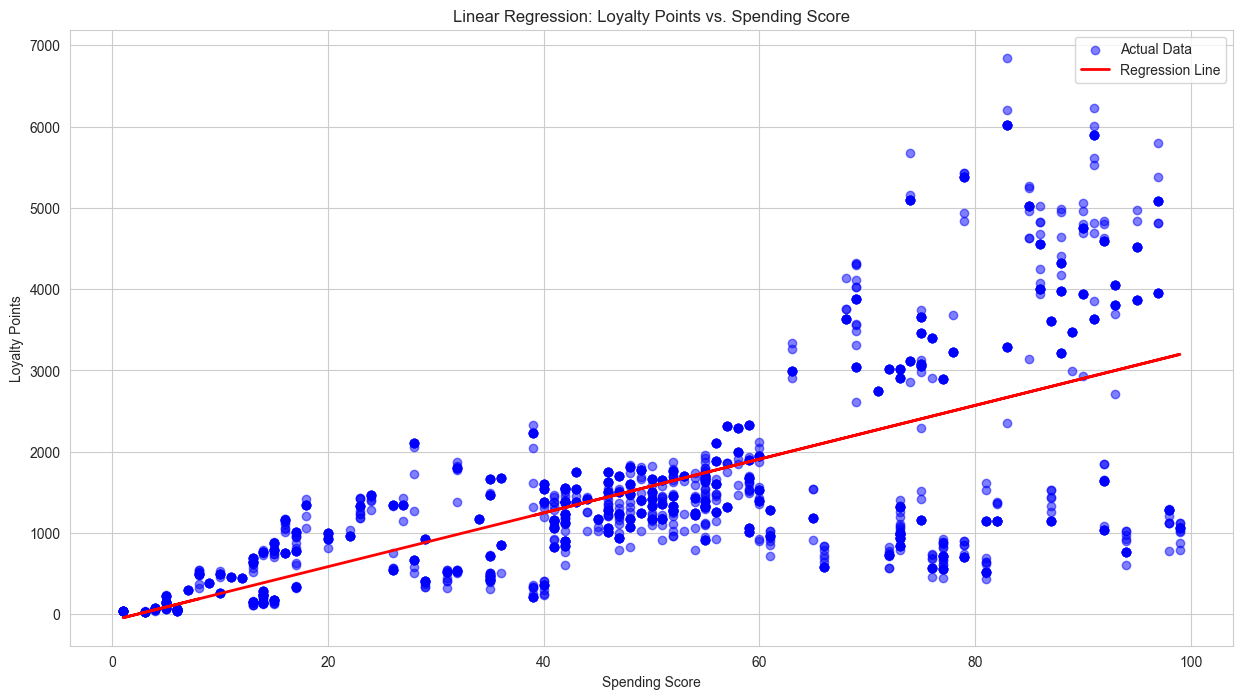

In [14]:
# Plot the graph with a regression line.
plt.figure(figsize=(15, 8))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Loyalty Points vs. Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.legend()
plt.grid(True)
plt.show()


### 5b. renumeration vs. loyalty

In [15]:
# Define independent variable.
X_renum = reviews_imported['renumeration'].values.reshape(-1,1)

# Define dependent variable.
Y_loyal = reviews_imported['loyalty_points'].values.reshape(-1,1)

# Create model and print summary of metrics.
lm = LinearRegression()

# fit the model
lm.fit(X_renum, Y_loyal)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# split the data.
X_renum_train, X_renum_test, Y_loyal_train, Y_loyal_test = train_test_split(X_renum, Y_loyal, test_size=0.2, random_state=42)

# fitting the model with the train data
lm.fit(X_renum_train, Y_loyal_train)


# predict the training data
YLoyalPred = lm.predict(X_renum_train)
YLoyalPred

array([[2404.74321047],
       [1002.50999921],
       [ 573.25493454],
       ...,
       [1231.4460337 ],
       [1231.4460337 ],
       [1946.87114149]], shape=(1600, 1))

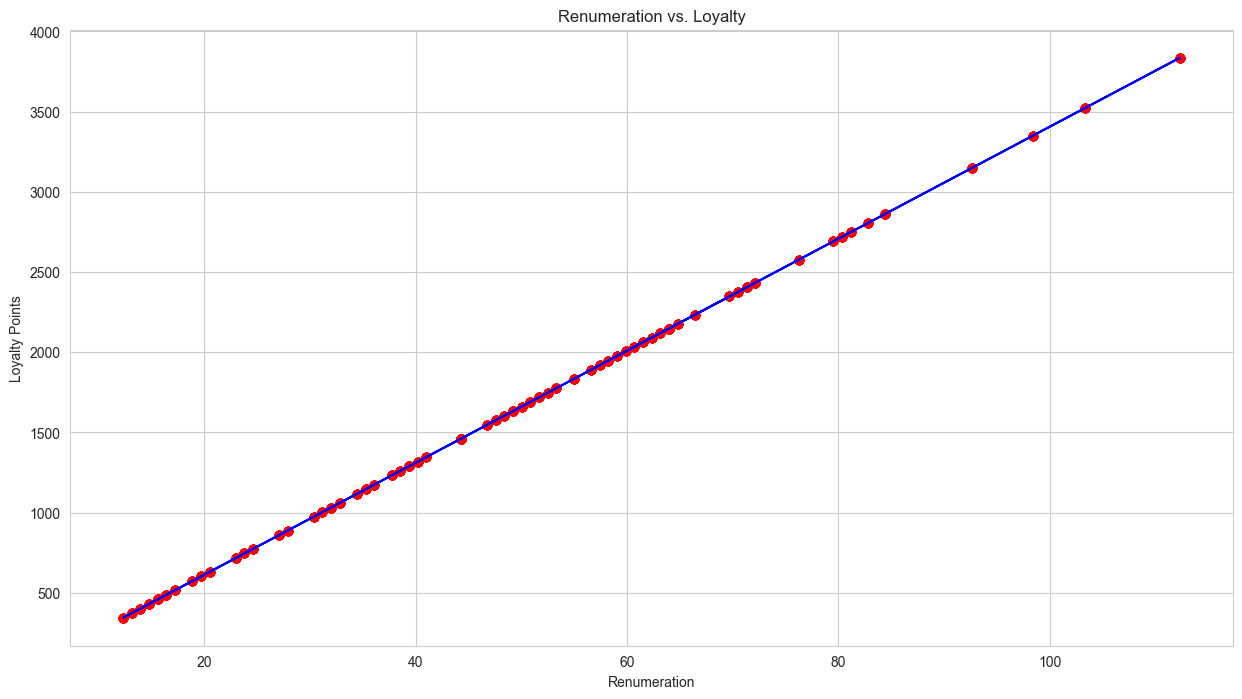

In [17]:
# visualizing the model
plt.figure(figsize=(15, 8))
plt.scatter(X_renum_train, YLoyalPred, color='red')
plt.plot(X_renum_train, YLoyalPred, color='blue')
plt.title("Renumeration vs. Loyalty")
plt.xlabel('Renumeration')
plt.ylabel('Loyalty Points')
plt.show()


In [18]:
# Evaluate the goodness of the model
print("R-Squared Value: ", lm.score(X_renum_train, Y_loyal_train) )
print("Intercept value: ", lm.intercept_)
print("Coefficient of determination: ", lm.coef_)


R-Squared Value:  0.3942033404299261
Intercept value:  [-84.93616462]
Coefficient of determination:  [[34.89878575]]


In [19]:
# predicting test set values
YLoyalPred_test = lm.predict(X_renum_test)

Text(0, 0.5, 'Loyalty Points')

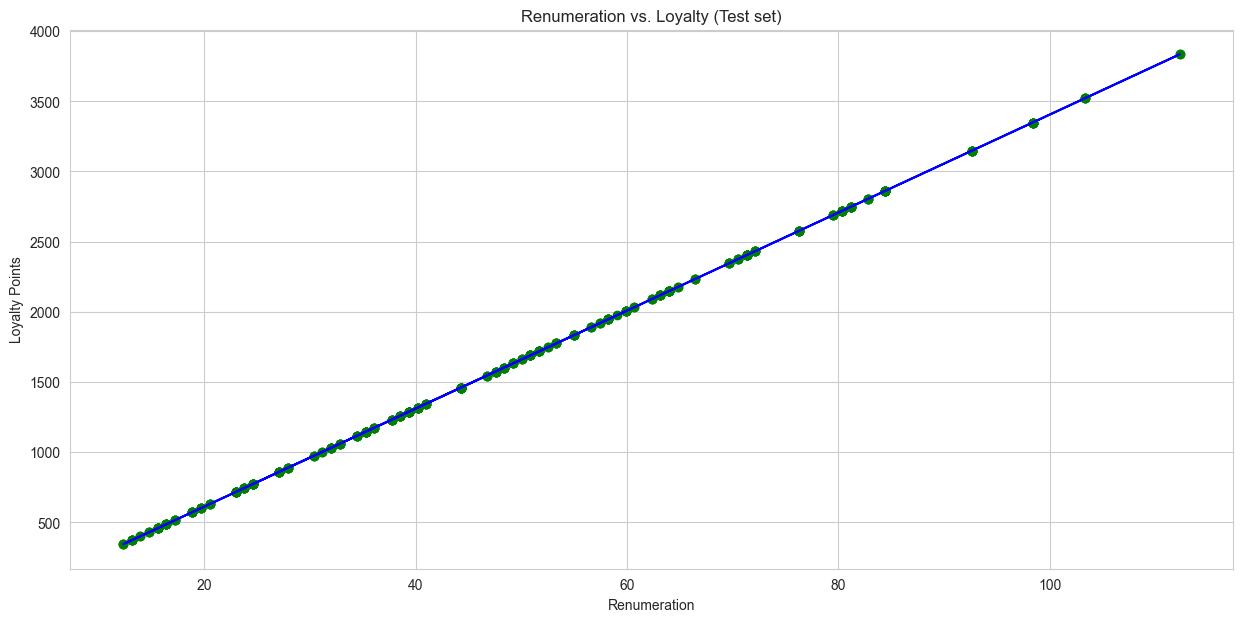

In [20]:
# visualising the test set
plt.figure(figsize=(15, 7))
plt.scatter(X_renum_test, YLoyalPred_test, color='green')
plt.plot(X_renum_test, YLoyalPred_test, color='blue')
plt.title("Renumeration vs. Loyalty (Test set)")
plt.xlabel('Renumeration')
plt.ylabel('Loyalty Points')

In [21]:
# determing the accuracy of the test data
print("R-Squared Value: ", lm.score(X_renum_test, Y_loyal_test) )

R-Squared Value:  0.317948920127035


### 5c. age vs. loyalty

In [22]:
# Define independent variable.
x = reviews_imported['age']

# Define dependent variable.
y = reviews_imported['loyalty_points']

# Create model and print summary of metrics
model = sm.OLS(y, x)
f = 'y ~ x'
age_result = ols(f, data = reviews_clean).fit()
age_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 05 Oct 2025   Prob (F-statistic):             0.0577
Time:                        21:34:16   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Extract the estimated parameters.
print(f"Parameters of OLS: {age_result.params}")

# Extract the standard errors.
print(f"Standard errors: {age_result.bse}")

# Extract the predicted values.
print(f"Predicted values of OLS: {age_result.predict()}")


Parameters of OLS: Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors: Intercept    88.248731
x             2.113177
dtype: float64
Predicted values of OLS: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [24]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (age_result.params['Intercept'] + age_result.params['x'] * reviews_imported['age'])

# View the output.
y_pred


0       1664.287247
1       1644.223221
2       1648.236026
3       1636.197611
4       1604.095169
           ...     
1995    1588.043949
1996    1563.967118
1997    1600.082364
1998    1600.082364
1999    1608.107975
Name: age, Length: 2000, dtype: float64

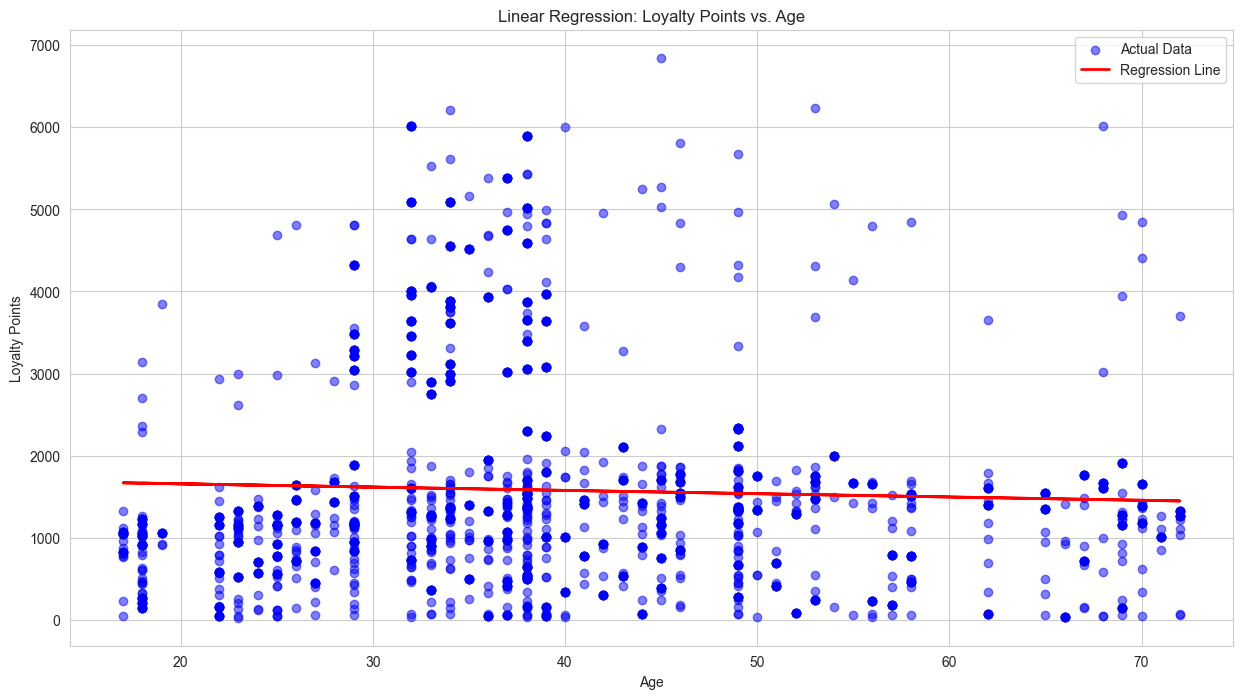

In [25]:
# Plot graph with regression line.
plt.figure(figsize=(15, 8))
plt.scatter(x, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Loyalty Points vs. Age')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.legend()
plt.grid(True)
plt.show()

## 6. Observations & Insights

#### Renumeration
R-Squared Value:  0.3627507867812333
Intercept value:  [-44.64448192]
Coefficient of determination:  [[33.48402196]]
based on the received values we can draw the following conclusion
- each 1000 pounds of renumeration adds circa 33 loaylty points
- R-Squared at 0.36 shows that though the number of loyalty points is dependent on the renumeration, there are other factors that influence this metric. So, the renumeration should be considered and used along with other independent variables.

# Assignment Activity 2: Exploring Data with Decision Trees

## Load and prepare the data

## Instructions
1. Prepare the data for creating your decision tree.
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame.
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library.
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.

Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


In [26]:
# Import the CSV file you prepared in Module 1.
reviews = pd.read_csv('reviews_clean.csv')

# Create a new DataFrame with the appropriate columns.
dt_set = reviews.drop(columns=['review', 'summary', 'product'])
dt_set.head()
dt_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 93.9+ KB


In [27]:
# Specify X for the independent variables and y as the dependent variable.
X = dt_set.drop(columns=['loyalty_points'])
y = dt_set['loyalty_points']

# quick view
X.head()


,gender,age,renumeration,spending_score,education
0,Male,18,12.30,39,graduate
1,Male,23,12.30,81,graduate
2,Female,22,13.12,6,graduate
3,Female,25,13.12,77,graduate
4,Female,33,13.94,40,graduate


In [28]:
# doing one-hot encoding for string values
cat_features = ['gender', 'education']
X = pd.get_dummies(X, drop_first=True, dtype=int)
# creating dummy variables
X.head()

,age,renumeration,spending_score,gender_Male,education_PhD,education_diploma,education_graduate,education_postgraduate
0,18,12.30,39,1,0,0,1,0
1,23,12.30,81,1,0,0,1,0
2,22,13.12,6,0,0,0,1,0
3,25,13.12,77,0,0,0,1,0
4,33,13.94,40,0,0,0,1,0


In [29]:
# Split the data set into a train and test sets for both X and y at a 30:70 ratio, random_state=42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
#create decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set with the fit() function.
regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### Evaluating the model

In [31]:
# predicting values
y_pred_train = regressor.predict(X_train)

# test prediction
y_pred_test = regressor.predict(X_test)# train model evaluation

# showing the results for train
print("R²:",   r2_score(y_train, y_pred_train))
print("MSE:",  mean_squared_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE:",  mean_absolute_error(y_train, y_pred_train))

R²: 1.0
MSE: 0.0
RMSE: 0.0
MAE: 0.0


In [32]:
# test model evaluation
print("R²:", r2_score(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE:", mean_absolute_error(y_test, y_pred_test))


R²: 0.994986812999381
MSE: 8120.345
RMSE: 90.1129568930018
MAE: 32.885


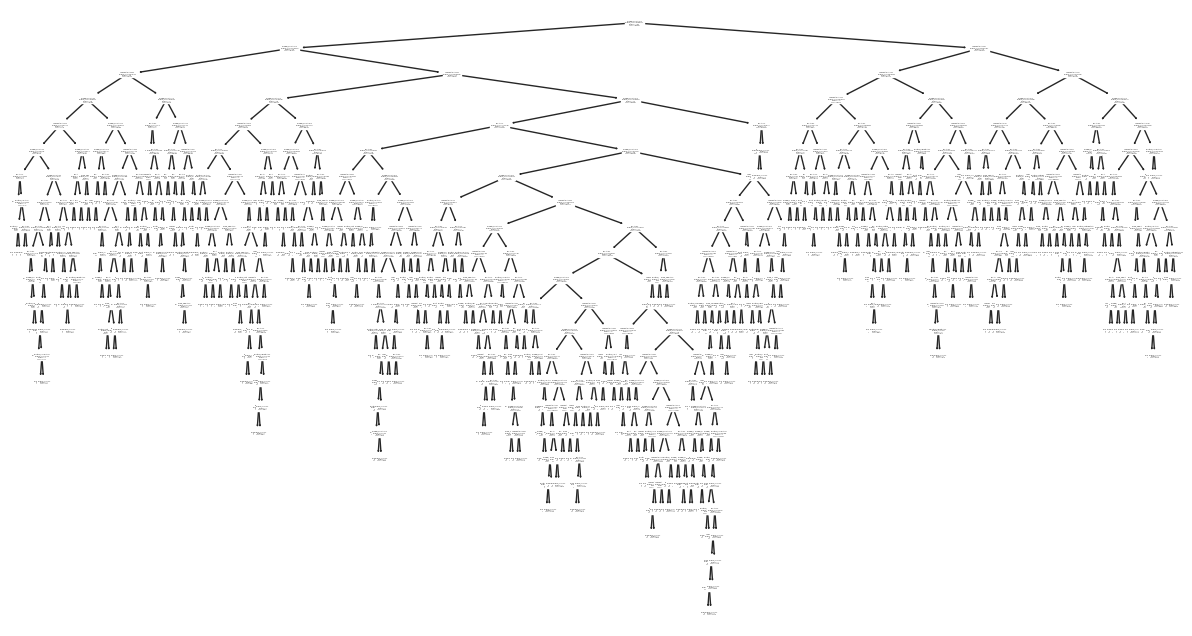

In [33]:
# visualising the current tree
plt.figure(figsize=(15, 8))
plot_tree(regressor,feature_names=X_train.columns)
plt.show()

as we can see from R-Squared for train =1, i.e 100%. It means that the tree is overfitted and requires some "trimming"

In [34]:
# exploring the current tree
print("Depth =",regressor.get_depth())
print("Leaves =",regressor.get_n_leaves())
print("R2: {:2.2%}".format(metrics.r2_score(y_train, y_pred_train)))

Depth = 23
Leaves = 557
R2: 100.00%


#### Pruning

In [35]:
# lists to store the level of depth and results for R-Squared
depth = []

# fitting and checking the results for depth levels from 2 to 21
for depth in range(2,21):
    model = DecisionTreeRegressor(random_state=42, max_depth=depth)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    print(f"max_depth = {depth:2d} → Train R²: {train_r2:.4f},  Test R²: {test_r2:.4f}")

max_depth =  2 → Train R²: 0.8252,  Test R²: 0.8319
max_depth =  3 → Train R²: 0.9104,  Test R²: 0.9148
max_depth =  4 → Train R²: 0.9461,  Test R²: 0.9433
max_depth =  5 → Train R²: 0.9613,  Test R²: 0.9567
max_depth =  6 → Train R²: 0.9742,  Test R²: 0.9654
max_depth =  7 → Train R²: 0.9855,  Test R²: 0.9774
max_depth =  8 → Train R²: 0.9924,  Test R²: 0.9878
max_depth =  9 → Train R²: 0.9950,  Test R²: 0.9901
max_depth = 10 → Train R²: 0.9966,  Test R²: 0.9912
max_depth = 11 → Train R²: 0.9974,  Test R²: 0.9923
max_depth = 12 → Train R²: 0.9981,  Test R²: 0.9928
max_depth = 13 → Train R²: 0.9989,  Test R²: 0.9931
max_depth = 14 → Train R²: 0.9993,  Test R²: 0.9943
max_depth = 15 → Train R²: 0.9996,  Test R²: 0.9945
max_depth = 16 → Train R²: 0.9998,  Test R²: 0.9945
max_depth = 17 → Train R²: 0.9999,  Test R²: 0.9947
max_depth = 18 → Train R²: 1.0000,  Test R²: 0.9949
max_depth = 19 → Train R²: 1.0000,  Test R²: 0.9950
max_depth = 20 → Train R²: 1.0000,  Test R²: 0.9951


based on the results I will continue with the depth lvl = 3, where Train R `~ 91%, Test R ~ 91%

In [36]:
# prune the model
pruned_regressor = DecisionTreeRegressor(random_state=42, max_depth=3,min_samples_leaf= 10)
pruned_regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [37]:
# Predictions
y_pred_train = pruned_regressor.predict(X_train)
y_pred_test  = pruned_regressor.predict(X_test)

# evaluation
print("Depth =", pruned_regressor.get_depth())
print("Leaves =", pruned_regressor.get_n_leaves())
print("Train R²:", metrics.r2_score(y_train, y_pred_train))
print("Test  R²:", metrics.r2_score(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Depth = 3
Leaves = 8
Train R²: 0.9103965014695461
Test  R²: 0.9148271803581075
Test RMSE: 371.4332689077185


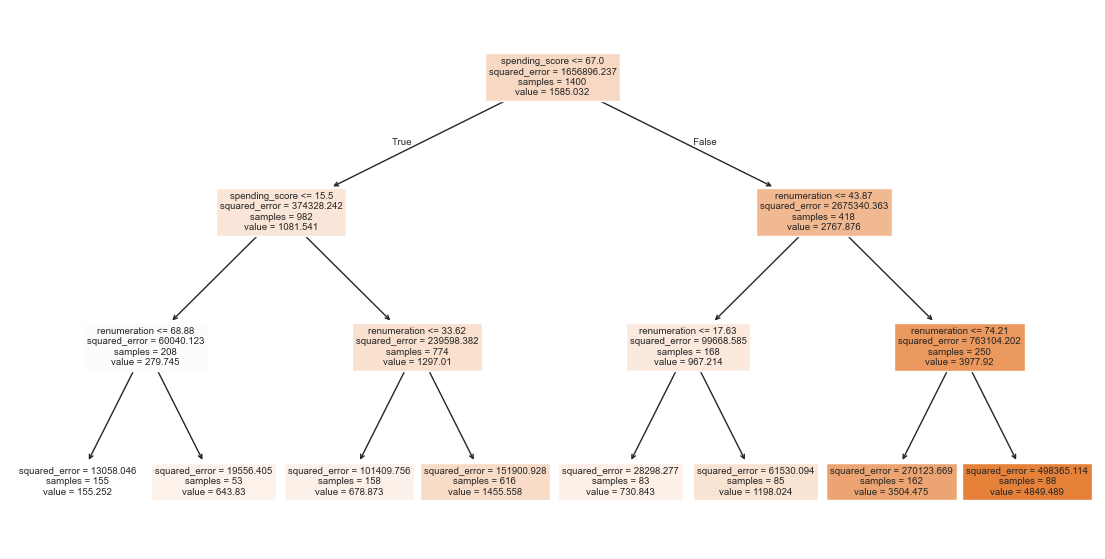

In [38]:
# plotting the tree
plt.figure(figsize=(14,7))
plot_tree(pruned_regressor, feature_names=X_train.columns, filled=True, max_depth=3)
plt.show()

In [39]:
#quick evaluation of the train set after pruning
y_pred_train = pruned_regressor.predict(X_train)
print("=== Goodness of Fit (TRAIN, after pruning) ===")
print("R²:",   r2_score(y_train, y_pred_train))
print("MSE:",  mean_squared_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE:",  mean_absolute_error(y_train, y_pred_train))

=== Goodness of Fit (TRAIN, after pruning) ===
R²: 0.9103965014695461
MSE: 148463.69952137195
RMSE: 385.3098746741017
MAE: 277.9036600428747


In [40]:
#qucik evaluation of the test set after pruning
y_pred_test = pruned_regressor.predict(X_test)
print("\n=== Goodness of Fit (TEST, after pruning) ===")
print(f"R²:   {r2_score(y_test, y_pred_test):.4f}")
print(f"MSE:  {mean_squared_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
print(f"MAE:  {mean_absolute_error(y_test, y_pred_test):.2f}")


=== Goodness of Fit (TEST, after pruning) ===
R²:   0.9148
MSE:  137962.67
RMSE: 371.43
MAE:  267.13


### Insigts and observations

# Assignment Activity 3: Making Predictions with Clustering

In [41]:
df3 = dt_set.drop(columns=['gender', 'loyalty_points','age', 'education'])
df3.head()


,renumeration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   renumeration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [43]:
df3.isnull().sum()

renumeration      0
spending_score    0
dtype: int64

In [44]:
df3.describe()

,renumeration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


#### Plot the remuneration versus spending score to determine any correlations and possible groups (clusters)

<Axes: xlabel='renumeration', ylabel='spending_score'>

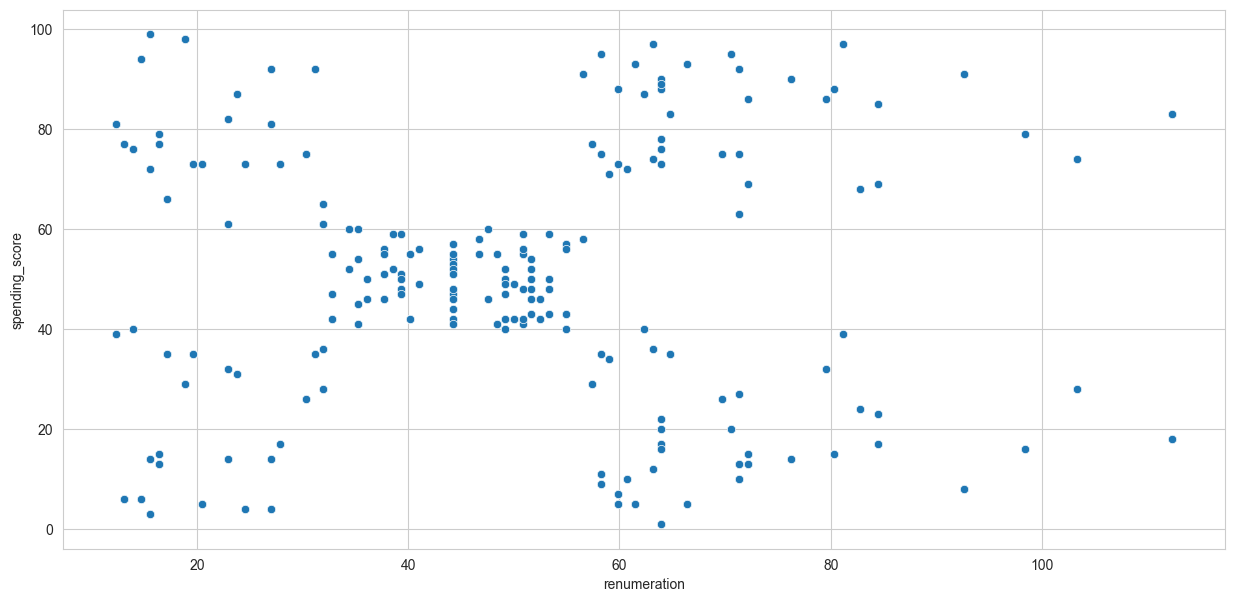

In [45]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='renumeration', y='spending_score', data=df3)

<Figure size 1500x900 with 0 Axes>

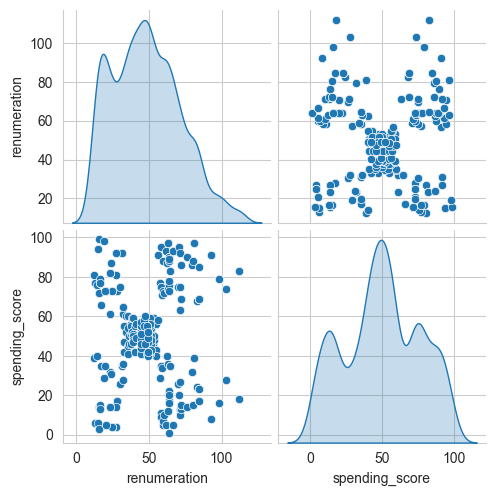

In [46]:
# Create a pairplot with Seaborn.
plt.figure(figsize=(15, 9))
sns.pairplot(df3, diag_kind= 'kde')

#### Elbow method to determine the optimal number of clusters for k-means clustering

Text(0.5, 1.0, 'the Elbow method')

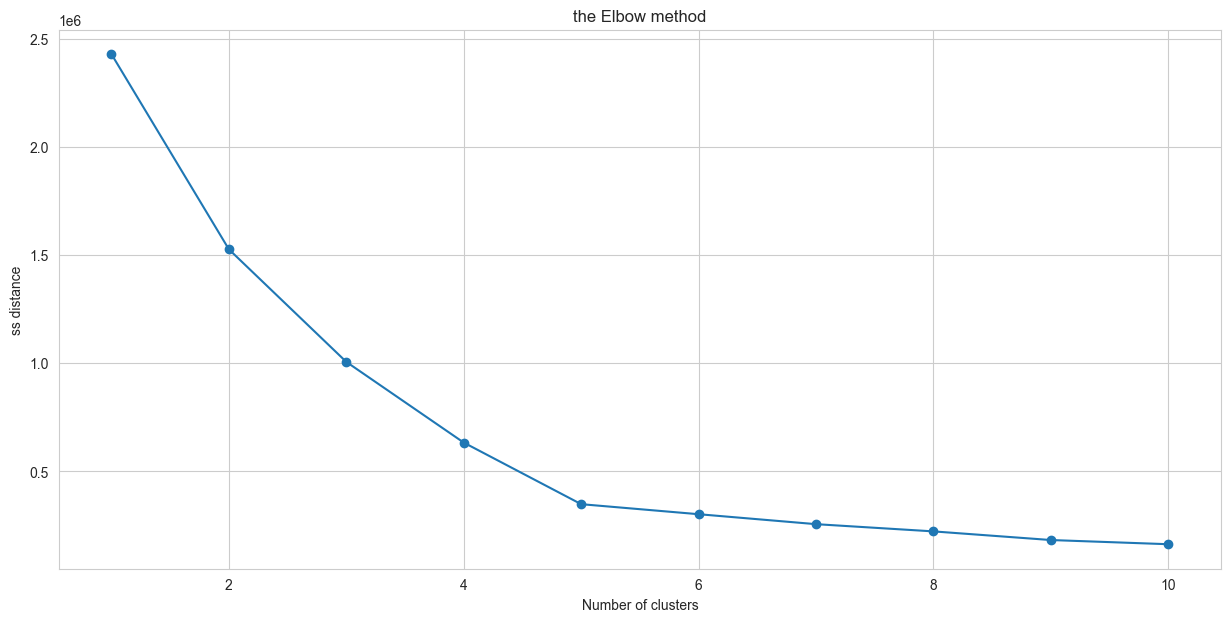

In [47]:
## Determine the number of clusters: Elbow method.
ss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++',n_init=10, max_iter=300)
    kmeans.fit(df3)
    ss.append(kmeans.inertia_)

# plotting the Elbow method
plt.figure(figsize=(15, 7))
plt.plot(range(1,11), ss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('ss distance')
plt.title('the Elbow method')

Text(0.5, 1.0, 'silhouette score vs number of clusters')

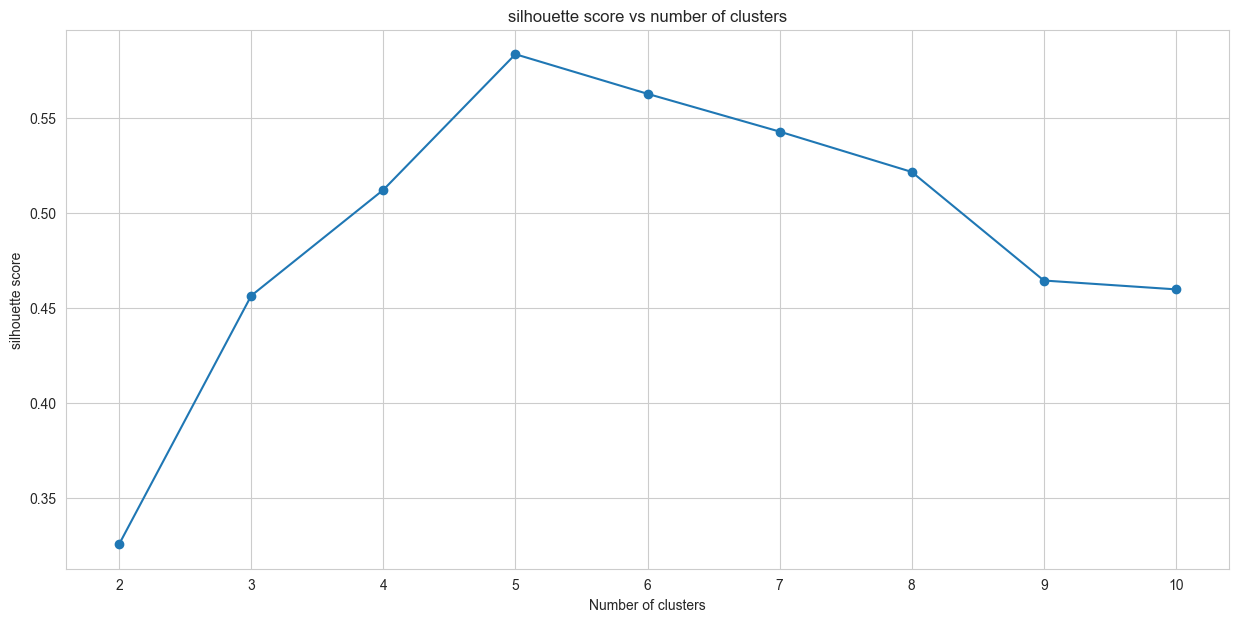

In [48]:
# determine the number of clusters via Silhouette

sil = []
kmax = 10
for k in range(2,kmax+1):
    kmeans = KMeans(n_clusters = k, random_state=42, init='k-means++', n_init=10, max_iter=300).fit(df3)
    labels = kmeans.labels_
    sil.append(silhouette_score(df3, labels, metric='euclidean'))

#plot the sihlouette
plt.figure(figsize=(15, 7))
plt.plot(range(2,kmax+1), sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.xlabel('Number of clusters')
plt.title('silhouette score vs number of clusters')

**From both visualisations we can see that the number of clusters is 5**

### Evaluate k-means model at different value of k (at least 3)

#### Investigating k=4

<Figure size 1500x700 with 0 Axes>

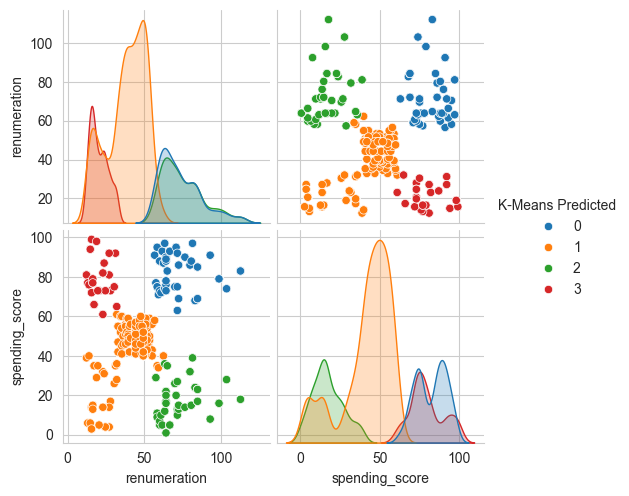

In [49]:
kmeans4 = KMeans(n_clusters=4,
                max_iter=15000,
                init= 'k-means++',
                random_state=42).fit(df3)
clusters4 = df3.copy()
clusters4['K-Means Predicted']=kmeans4.labels_

#plotting 4 clusters
plt.figure(figsize=(15, 7))
sns.pairplot(clusters4, diag_kind= 'kde', hue='K-Means Predicted',palette = 'tab10')

In [50]:
# collecting metrics
c_metrics4 = clusters4.groupby('K-Means Predicted')['spending_score'].agg(['min', 'max', 'mean'])
c_metrics4_summary = c_metrics4.mean()
c_metrics4_summary

min     32.000000
max     74.000000
mean    55.164888
dtype: float64

#### investigationg k = 6

<Figure size 1500x700 with 0 Axes>

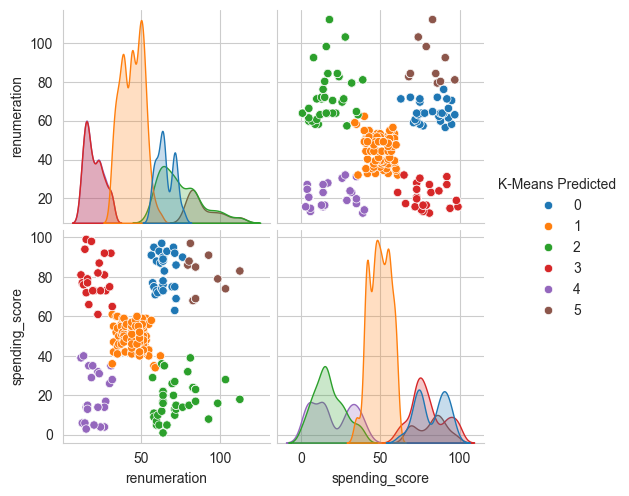

In [51]:
kmeans6 = KMeans(n_clusters=6,
                max_iter=15000,
                init= 'k-means++',
                random_state=42).fit(df3)
clusters6 = df3.copy()
clusters6['K-Means Predicted'] = kmeans6.labels_

#plotting 6 clusters
plt.figure(figsize=(15, 7))
sns.pairplot(clusters6, diag_kind= 'kde', hue='K-Means Predicted',palette = 'tab10')

In [52]:
# adding to the metrics
c_metrics6 = clusters6.groupby('K-Means Predicted')['spending_score'].agg(['min', 'max', 'mean'])
c_metrics6_summary = c_metrics6.mean()
c_metrics6_summary

min     38.333333
max     72.166667
mean    55.018050
dtype: float64

#### k = 5 (optimal value) Final Model

<Figure size 1500x700 with 0 Axes>

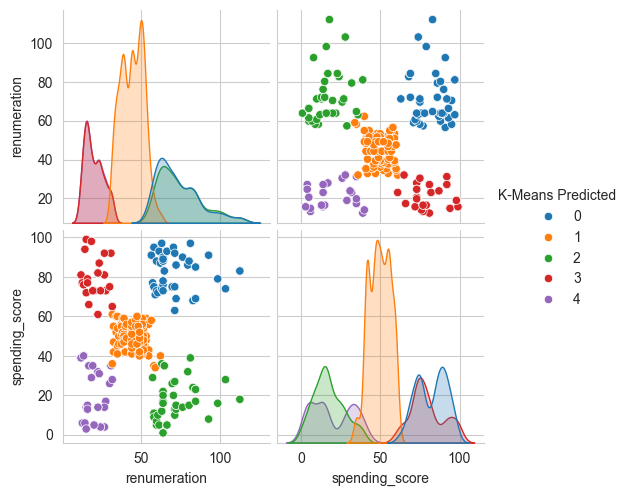

In [53]:
kmeans5 = KMeans(n_clusters=5,
                max_iter=15000,
                init= 'k-means++',
                random_state=42).fit(df3)

clusters5 = df3.copy()
clusters5['K-Means Predicted'] = kmeans5.labels_


#plotting 5 clusters
plt.figure(figsize=(15, 7))
sns.pairplot(clusters5, diag_kind= 'kde', hue='K-Means Predicted',palette = 'tab10')

In [54]:
print (df3.head())

   renumeration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40


In [55]:
c_metrics5 = clusters5.groupby('K-Means Predicted')['spending_score'].agg(['min', 'max', 'mean'])
c_metrics5_summary = c_metrics5.mean()
c_metrics5_summary

min     32.400000
max     67.200000
mean    49.628516
dtype: float64

In [56]:
# final metric table
c_metrics_final = pd.DataFrame({'K=4': c_metrics4_summary,'K=5': c_metrics5_summary,'K=6': c_metrics6_summary})
c_metrics_final

,K=4,K=5,K=6
min,32.000000,32.400000,38.333333
max,74.000000,67.200000,72.166667
mean,55.164888,49.628516,55.018050


<Axes: xlabel='spending_score', ylabel='renumeration'>

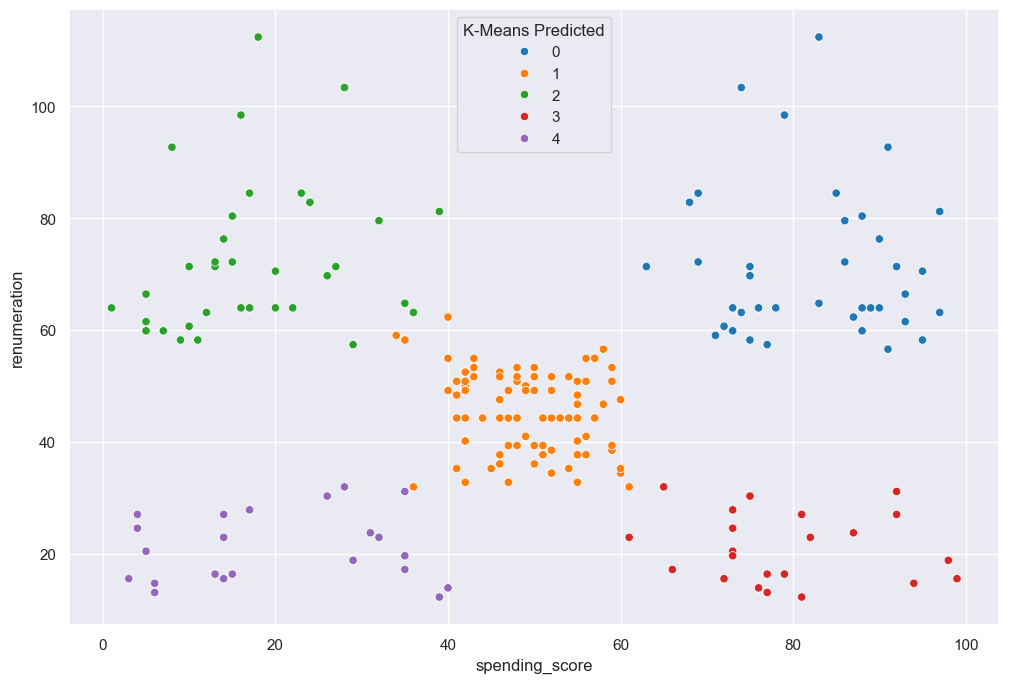

In [57]:
# plotting the final
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spending_score' , y='renumeration', data=clusters5,
                hue='K-Means Predicted', palette='tab10')

..... your observations here

# Assignment Activity 4: Analysing customer sentiments with reviews

Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data.
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

In [58]:
# load the dataset
df3 = pd.read_csv('reviews_clean.csv')
reviews_clean.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [59]:
# checking for missing values
reviews_clean.isnull().sum()

gender            0
age               0
renumeration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

In [60]:
reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


#### change to lower case and bring and join the elements in columns

for this sentiment analysis I will use a subset, consisting only from "reviews" and "summary" columns in order not to damage the original source.

In [61]:
#create a new subset
text_frame = reviews_clean.copy().drop(columns=['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points', 'education', 'product'])
text_frame.head()
text_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [62]:
# bring "review" column test to lower case
text_frame['review'] = (text_frame['review'].str.lower().str.strip())
#quick check
text_frame.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,Another worthless Dungeon Master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,Five Stars
4,as my review of gf9's previous screens these w...,Money trap


In [63]:
# bring "summary" to lower case
text_frame['summary'] = (text_frame['summary'].str.lower().str.strip())

# quick check
text_frame.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


In [64]:
# replace all the punctuation in "review" column
text_frame['review'] = (text_frame['review'].str.replace('[^\w\s]','', regex=True).str.replace('\n', '', regex=False))
text_frame.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9your unpainted min...,another worthless dungeon master's screen from...
2,nice art nice printing why two panels are fil...,"pretty, but also pretty useless"
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [65]:
#replace all the punctuation in "summary" column
text_frame['summary'] = (text_frame['summary'].str.replace('[^\w\s]','', regex=True).str.replace('\n', '', regex=False))
text_frame

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9your unpainted min...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for allkeeps the mind nimble,great game
1998,fun game,four stars


In [66]:
# checking for duplicates in columns
print(text_frame ['review'].duplicated().sum())
print(text_frame ['summary'].duplicated().sum())

50
649


In [67]:
# drop duplicates in both columns
text_frame.drop_duplicates(subset=['review'], inplace=True)
text_frame.drop_duplicates(subset=['summary'], inplace=True)

# Preview data
text_frame.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9your unpainted min...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [68]:
# checking for duplicates in columns after dropping some values
print(text_frame ['review'].duplicated().sum())
print(text_frame ['summary'].duplicated().sum())

0
0


In [69]:
text_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1349 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1349 non-null   object
 1   summary  1349 non-null   object
dtypes: object(2)
memory usage: 31.6+ KB


In [70]:
text_frame.dtypes

review     object
summary    object
dtype: object

#### Tokenize and create wordcloud

I will not create a new data frame as I already have done it in the previous step

In [71]:
# tokenize "reviews"
text_frame['review'] = text_frame['review'].apply(word_tokenize)

#tokenize "summary"
text_frame['summary'] = text_frame['summary'].apply(word_tokenize)

# view the results
text_frame

,review,summary
0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,"[an, open, letter, to, galeforce9your, unpaint...","[another, worthless, dungeon, masters, screen,..."
2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...
1989,"[this, is, a, fun, card, game, for, people, wh...","[this, is, a, fun, card, game, for, people, wh..."
1990,"[fun, for, the, family, just, make, certain, y...","[sort, of, a, card, game, equivalent, of, scra..."
1992,"[great, game, to, keep, the, mind, active, we,...","[great, game, to, keep, the, mind, active]"
1994,"[we, are, retired, and, find, this, a, great, ...","[a, great, mind, game]"


In [72]:
# remove the stop words in "review"
stop_words = stopwords.words('english')
text_frame['review'] = text_frame['review'].apply(lambda tokens:[word for word in tokens if word.lower() not in stopwords.words('english')])

#remove stop words in "summary"
text_frame['summary'] = text_frame['summary'].apply(lambda tokens:[word for word in tokens if word.lower() not in stopwords.words('english')])

In [73]:
# view the result
text_frame

,review,summary
0,"[comes, dms, screen, space, screen, absolute, ...","[fact, 50, space, wasted, art, terribly, infor..."
1,"[open, letter, galeforce9your, unpainted, mini...","[another, worthless, dungeon, masters, screen,..."
2,"[nice, art, nice, printing, two, panels, fille...","[pretty, also, pretty, useless]"
3,"[amazing, buy, bought, gift, new, dm, perfect]","[five, stars]"
4,"[review, gf9s, previous, screens, completely, ...","[money, trap]"
...,...,...
1989,"[fun, card, game, people, like, words, artwork...","[fun, card, game, people, like, words]"
1990,"[fun, family, make, certain, agree, dictionary...","[sort, card, game, equivalent, scrabble, lot, ..."
1992,"[great, game, keep, mind, active, play, 87, ye...","[great, game, keep, mind, active]"
1994,"[retired, find, great, way, stay, alert, spell...","[great, mind, game]"


In [74]:
# putting all words from "reviews" into one big list
all_r_words =[word for tokens in text_frame['review'] for word in tokens]
all_r_words

['comes',
 'dms',
 'screen',
 'space',
 'screen',
 'absolute',
 'premium',
 'fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'well',
 'makes',
 'completely',
 'useless',
 'reason',
 'gave',
 '2',
 'stars',
 '1',
 'technically',
 'speaking',
 'least',
 'still',
 'stand',
 'block',
 'notes',
 'dice',
 'rolls',
 'drops',
 'ball',
 'completely',
 'open',
 'letter',
 'galeforce9your',
 'unpainted',
 'miniatures',
 'bad',
 'spell',
 'cards',
 'great',
 'board',
 'games',
 'meh',
 'dm',
 'screens',
 'however',
 'freaking',
 'terrible',
 'im',
 'still',
 'waiting',
 'single',
 'screen',
 'isnt',
 'polluted',
 'pointless',
 'artwork',
 'useful',
 'referenceable',
 'tables',
 'youve',
 'created',
 'single',
 'use',
 'screen',
 'useful',
 'running',
 'storm',
 'kings',
 'thunder',
 'adventure',
 'even',
 'despite',
 'fact',
 'geared',
 'adventure',
 'path',
 'usefulness',
 'negligible',
 'best',
 'massive',
 'swath',
 'inner',
 'panel',
 'wasted',
 'art

In [75]:
# join the word in one string
r_words = " ".join(all_r_words)
r_words

'comes dms screen space screen absolute premium fact 50 space wasted art terribly informative needed art well makes completely useless reason gave 2 stars 1 technically speaking least still stand block notes dice rolls drops ball completely open letter galeforce9your unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless themselvesin short stop making crap dm screens nice art nice printing two panels filled general forgotten realms map beyond one blue ocean wastei dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able transpose adventure la

In [76]:
# create 'review' wordcloud
r_cloud = WordCloud(width = 800, height = 800, background_color = 'white', colormap= 'viridis').generate(r_words)

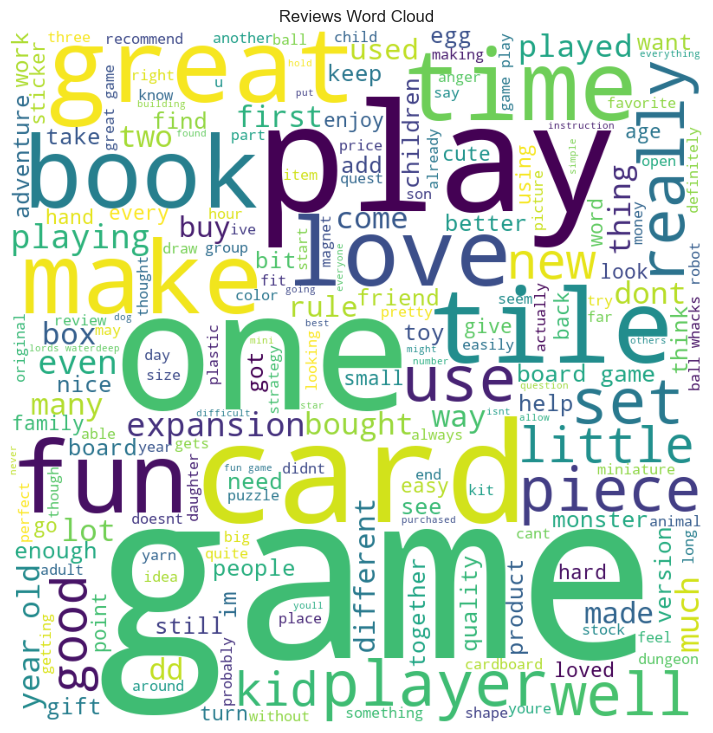

In [77]:
# plotting the 'review' cloud
plt.figure(figsize=(16, 9))
plt.imshow(r_cloud)
plt.axis('off')
plt.title('Reviews Word Cloud')
plt.show()

In [78]:
# putting all words from "summary" into one big list
all_s_words = [word for tokens in text_frame['summary'] for word in tokens]
all_s_words

['fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'galeforce9',
 'pretty',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'best',
 'gm',
 'screen',
 'ever',
 'great',
 'could',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'value',
 'add',
 'product',
 'line',
 'love',
 'map',
 'general',
 'dm',
 'screen',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'good',
 'book',
 'buckley',
 'card',
 'mommer',
 'advanced',
 'good',
 'gets',
 'better',
 'know',
 'youre',
 'getting',
 'dont',
 'bother',
 'worst',
 'value',
 'ive',
 'ever',
 'seen',
 'enough',
 'product',
 'good',
 'product',
 'temporary',
 'tattoos',
 'good',
 'gift',
 'huge',
 'hit',
 'gorgeous',
 'pictures',
 'wonderful',
 'designs',
 'wow',
 'great',
 'coloring',
 'book',
 'nice',
 'book',
 'great',
 'pictures',
 'perfect',
 'well',
 'done',
 'relaxation',
 'beautiful',
 'coloring',

In [79]:
# join the word in one string
s_words = " ".join(all_s_words)
s_words

'fact 50 space wasted art terribly informative needed art another worthless dungeon masters screen galeforce9 pretty also pretty useless five stars money trap best gm screen ever great could even better another missed opportunity value add product line love map general dm screen weak game fell completely flat good book buckley card mommer advanced good gets better know youre getting dont bother worst value ive ever seen enough product good product temporary tattoos good gift huge hit gorgeous pictures wonderful designs wow great coloring book nice book great pictures perfect well done relaxation beautiful coloring book pictures great ive done one gave great buy cant wait work book stained glass perfection four stars beautiful nice three stars like every image contained stained glass coloring book creative stained glass pictures nice pictures great transaction drawings nice put windows great 30 minute toy great ok best fun robot themed gift 6 yr old great party thank bag addition tiny b

In [80]:
# create 'summary' wordcloud
s_cloud = WordCloud(width = 800, height = 800, background_color = 'white', colormap= 'Set1').generate(s_words)

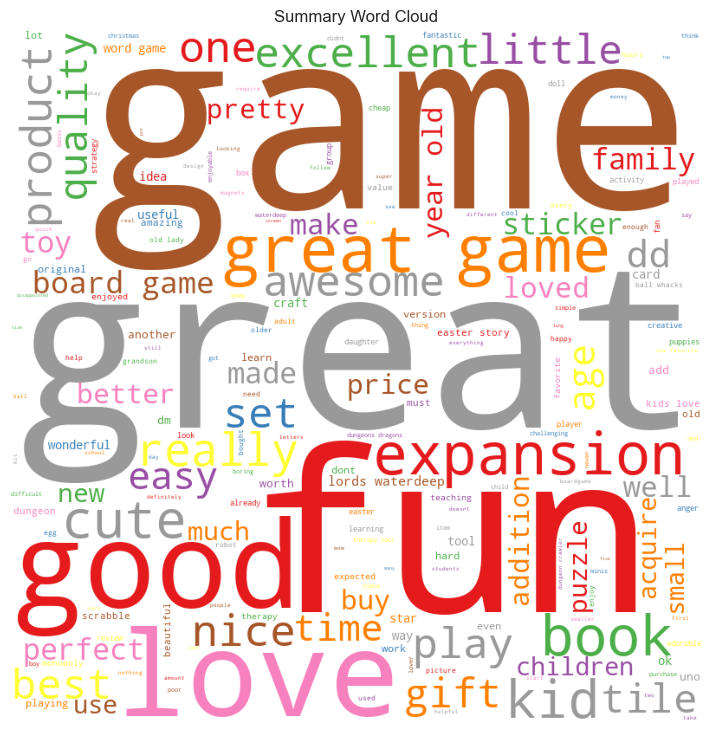

In [81]:
# plotting the 'summary' cloud
plt.figure(figsize=(16, 9))
plt.imshow(s_cloud)
plt.axis('off')
plt.title('Summary Word Cloud')
plt.show()

## Frequency Distribution and Polarity

In [82]:
# Determine the frequency distribution for reviews
r_frequency = FreqDist(all_r_words)

# Determine the frequency distribution for summary
s_frequency = FreqDist(all_s_words)

In [83]:
r_frequency

FreqDist({'game': 1324, 'one': 460, 'play': 432, 'fun': 395, 'great': 386, 'like': 366, 'get': 292, 'really': 277, 'cards': 275, 'tiles': 272, ...})

In [84]:
s_frequency

FreqDist({'game': 268, 'great': 236, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [85]:
# remove all alphanumeric characters in reviews
clean_r_words = [word for word in all_r_words if word.isalpha()]

# view the output
clean_r_words

['comes',
 'dms',
 'screen',
 'space',
 'screen',
 'absolute',
 'premium',
 'fact',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'well',
 'makes',
 'completely',
 'useless',
 'reason',
 'gave',
 'stars',
 'technically',
 'speaking',
 'least',
 'still',
 'stand',
 'block',
 'notes',
 'dice',
 'rolls',
 'drops',
 'ball',
 'completely',
 'open',
 'letter',
 'unpainted',
 'miniatures',
 'bad',
 'spell',
 'cards',
 'great',
 'board',
 'games',
 'meh',
 'dm',
 'screens',
 'however',
 'freaking',
 'terrible',
 'im',
 'still',
 'waiting',
 'single',
 'screen',
 'isnt',
 'polluted',
 'pointless',
 'artwork',
 'useful',
 'referenceable',
 'tables',
 'youve',
 'created',
 'single',
 'use',
 'screen',
 'useful',
 'running',
 'storm',
 'kings',
 'thunder',
 'adventure',
 'even',
 'despite',
 'fact',
 'geared',
 'adventure',
 'path',
 'usefulness',
 'negligible',
 'best',
 'massive',
 'swath',
 'inner',
 'panel',
 'wasted',
 'artwork',
 'bloated',
 'overland',
 'map'

In [86]:
# remove all alphanumeric characters in summary
clean_s_words = [word for word in all_s_words if word.isalpha()]

# view the output
clean_s_words

['fact',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'pretty',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'best',
 'gm',
 'screen',
 'ever',
 'great',
 'could',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'value',
 'add',
 'product',
 'line',
 'love',
 'map',
 'general',
 'dm',
 'screen',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'good',
 'book',
 'buckley',
 'card',
 'mommer',
 'advanced',
 'good',
 'gets',
 'better',
 'know',
 'youre',
 'getting',
 'dont',
 'bother',
 'worst',
 'value',
 'ive',
 'ever',
 'seen',
 'enough',
 'product',
 'good',
 'product',
 'temporary',
 'tattoos',
 'good',
 'gift',
 'huge',
 'hit',
 'gorgeous',
 'pictures',
 'wonderful',
 'designs',
 'wow',
 'great',
 'coloring',
 'book',
 'nice',
 'book',
 'great',
 'pictures',
 'perfect',
 'well',
 'done',
 'relaxation',
 'beautiful',
 'coloring',
 'book',
 'pictures',

In [87]:
# determine the 15 most common words from " reviews"
print(r_frequency.most_common(15))

[('game', 1324), ('one', 460), ('play', 432), ('fun', 395), ('great', 386), ('like', 366), ('get', 292), ('really', 277), ('cards', 275), ('tiles', 272), ('book', 252), ('would', 248), ('time', 238), ('new', 233), ('love', 233)]


In [88]:
# determine the 15 most common words from " summary"
print(s_frequency.most_common(15))

[('game', 268), ('great', 236), ('fun', 175), ('good', 84), ('love', 70), ('like', 54), ('kids', 48), ('book', 42), ('expansion', 42), ('cute', 40), ('old', 34), ('really', 30), ('set', 29), ('nice', 28), ('one', 28)]


In [89]:
# Provided function.
def generate_polarity(comment):
#Extract polarity score (-1 to +1) for each comment
    return TextBlob(comment).sentiment[0]

# reverting the review column back into text so it will work with TextBlob
text_frame['review_text'] = text_frame['review'].apply(lambda x: " ".join(x))

# determine the polarity of "reviews"
text_frame['review_polarity'] = (text_frame['review_text'].apply(generate_polarity))
text_frame['review_polarity']

0      -0.242857
1      -0.019468
2       0.128851
3       0.578788
4      -0.316667
          ...   
1989    0.250000
1990    0.171429
1992    0.144444
1994    0.400000
1995    0.168750
Name: review_polarity, Length: 1349, dtype: float64

In [90]:
# reverting the summary column back into text so it will work with TextBlob
text_frame['summary_text'] = text_frame['summary'].apply(lambda x: " ".join(x))

# determine the polarity of "summary"
text_frame['summary_polarity'] = (text_frame['summary_text'].apply(generate_polarity))
text_frame['summary_polarity']

0      -0.600000
1      -0.800000
2       0.000000
3       0.000000
4       0.000000
          ...   
1989   -0.050000
1990   -0.400000
1992    0.088889
1994    0.200000
1995    0.200000
Name: summary_polarity, Length: 1349, dtype: float64

In [91]:
text_frame

,review,summary,review_text,review_polarity,summary_text,summary_polarity
0,"[comes, dms, screen, space, screen, absolute, ...","[fact, 50, space, wasted, art, terribly, infor...",comes dms screen space screen absolute premium...,-0.242857,fact 50 space wasted art terribly informative ...,-0.600000
1,"[open, letter, galeforce9your, unpainted, mini...","[another, worthless, dungeon, masters, screen,...",open letter galeforce9your unpainted miniature...,-0.019468,another worthless dungeon masters screen galef...,-0.800000
2,"[nice, art, nice, printing, two, panels, fille...","[pretty, also, pretty, useless]",nice art nice printing two panels filled gener...,0.128851,pretty also pretty useless,0.000000
3,"[amazing, buy, bought, gift, new, dm, perfect]","[five, stars]",amazing buy bought gift new dm perfect,0.578788,five stars,0.000000
4,"[review, gf9s, previous, screens, completely, ...","[money, trap]",review gf9s previous screens completely unnece...,-0.316667,money trap,0.000000
...,...,...,...,...,...,...
1989,"[fun, card, game, people, like, words, artwork...","[fun, card, game, people, like, words]",fun card game people like words artwork cards ...,0.250000,fun card game people like words,-0.050000
1990,"[fun, family, make, certain, agree, dictionary...","[sort, card, game, equivalent, scrabble, lot, ...",fun family make certain agree dictionary front...,0.171429,sort card game equivalent scrabble lot easier,-0.400000
1992,"[great, game, keep, mind, active, play, 87, ye...","[great, game, keep, mind, active]",great game keep mind active play 87 year old m...,0.144444,great game keep mind active,0.088889
1994,"[retired, find, great, way, stay, alert, spell...","[great, mind, game]",retired find great way stay alert spelling voc...,0.400000,great mind game,0.200000


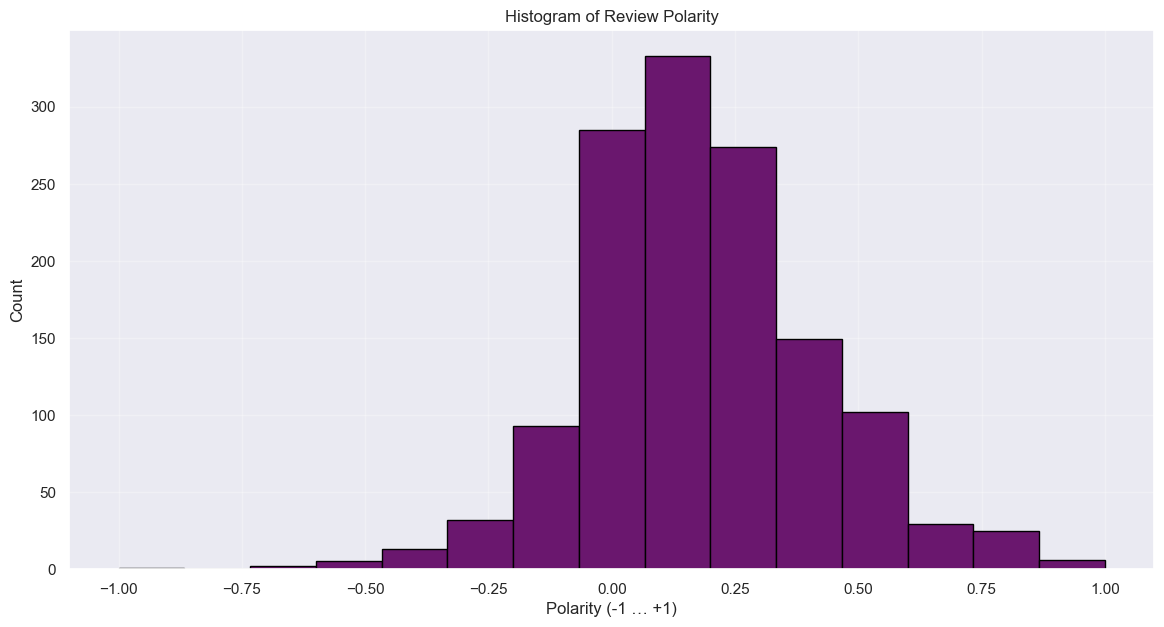

In [92]:
# Review: Create a histogram plot with bins = 15.
# Histogram of Reviews polarity
plt.figure(figsize=(14,7))
plt.hist(text_frame['review_polarity'].dropna(), bins=15, edgecolor='black', color=plt.cm.inferno(0.3))
plt.title('Histogram of Review Polarity')
plt.xlabel('Polarity (-1 … +1)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

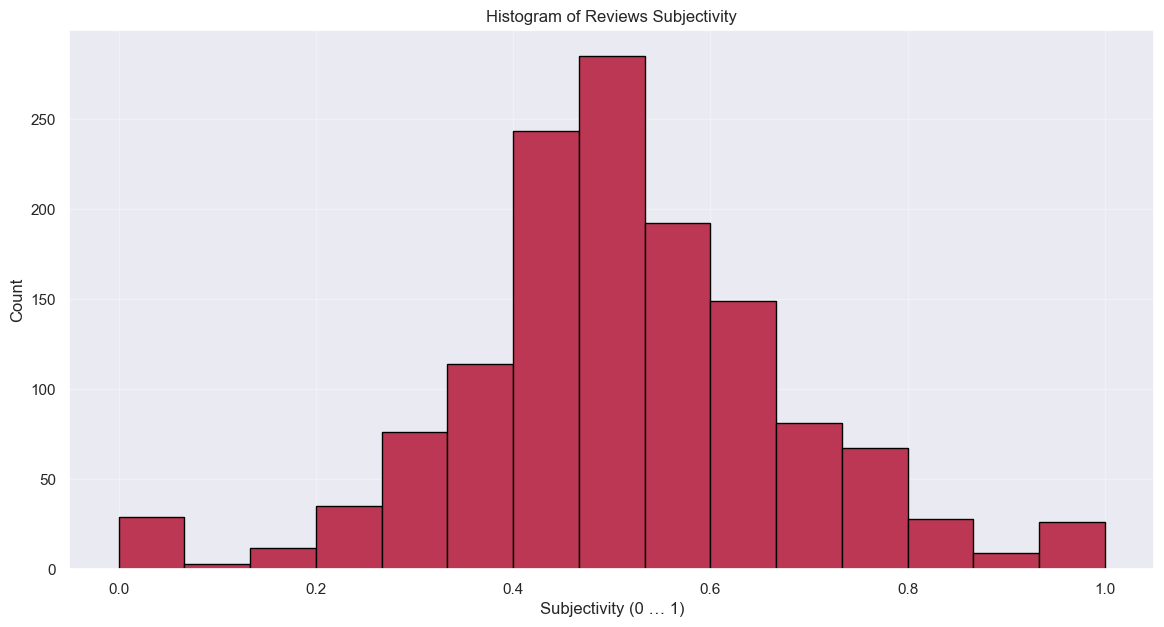

In [94]:

text_frame['review_subjectivity'] = text_frame['review_text'].apply(lambda s: TextBlob(s).sentiment[1])
# Histogram of Review sentiment score

plt.figure(figsize=(14,7))
plt.hist(text_frame['review_subjectivity'].dropna(), bins=15, edgecolor='black', color=plt.cm.inferno(0.5))
plt.title('Histogram of Reviews Subjectivity')
plt.xlabel('Subjectivity (0 … 1)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

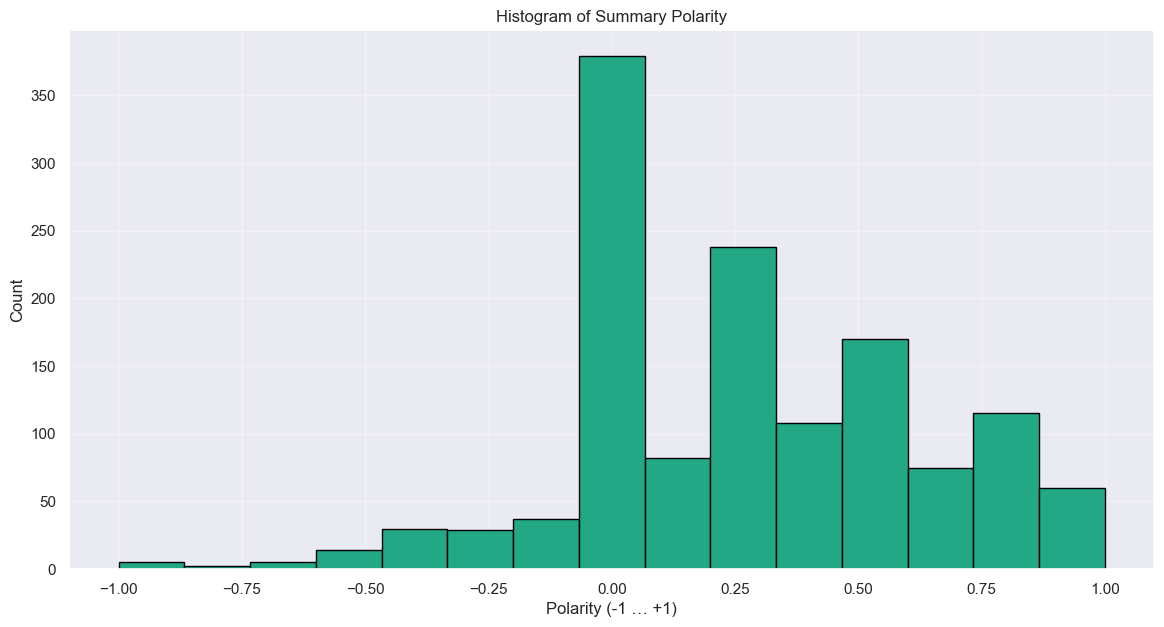

In [95]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of Summary polarity
plt.figure(figsize=(14,7))
plt.hist(text_frame['summary_polarity'].dropna(), bins=15, edgecolor='black', color=plt.cm.viridis(0.6))
plt.title('Histogram of Summary Polarity')
plt.xlabel('Polarity (-1 … +1)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()



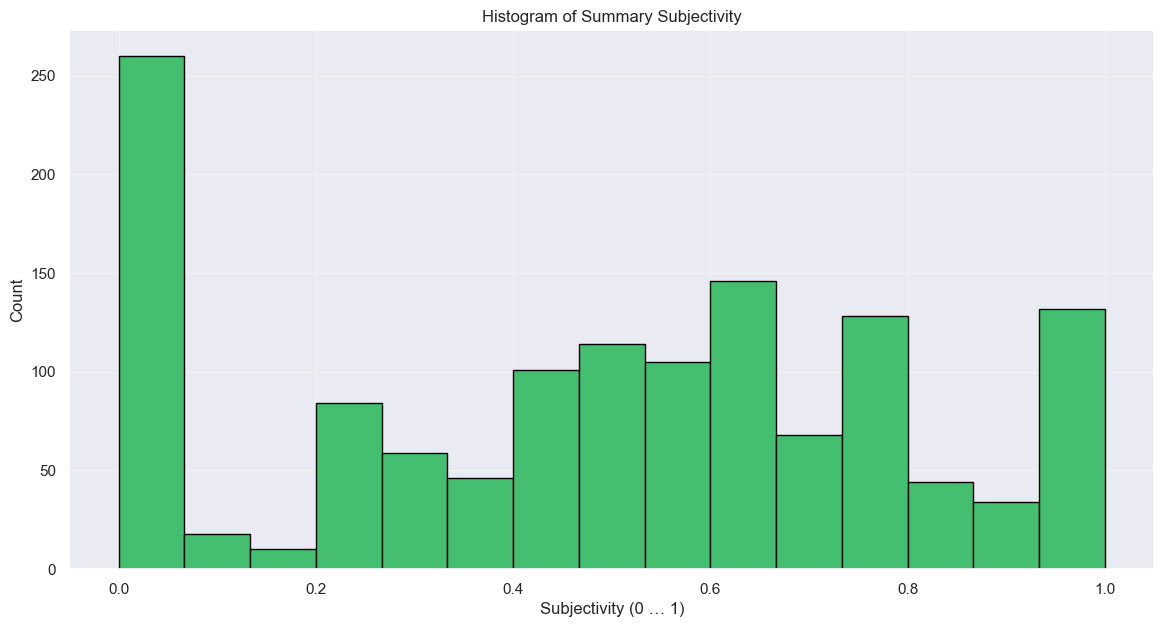

In [97]:

text_frame['summary_subjectivity'] = text_frame['summary_text'].apply(lambda s: TextBlob(s).sentiment[1])
# Histogram of Summary sentiment score

plt.figure(figsize=(14,7))
plt.hist(text_frame['summary_subjectivity'].dropna(), bins=15, edgecolor='black', color=plt.cm.viridis(0.7))
plt.title('Histogram of Summary Subjectivity')
plt.xlabel('Subjectivity (0 … 1)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

In [101]:
# top 20 negative reviews
top_nr = text_frame.sort_values(by = 'review_polarity', ascending=True).head(20)
top_nr

,review,summary,review_text,review_polarity,summary_text,summary_polarity,review_subjectivity,summary_subjectivity
208,"[booo, unles, patient, know, measure, didnt, p...","[boring, unless, craft, person]",booo unles patient know measure didnt patience...,-1.000000,boring unless craft person,-1.000000,1.000000,1.000000
526,"[keeps, clients, engaged, helping, develop, an...","[worth, price]",keeps clients engaged helping develop anger ma...,-0.700000,worth price,0.300000,0.200000,0.100000
174,"[sent, product, granddaughter, pompom, maker, ...","[faulty, product]",sent product granddaughter pompom maker comes ...,-0.625000,faulty product,0.000000,0.475000,0.000000
182,"[incomplete, kit, disappointing]","[incomplete, kit]",incomplete kit disappointing,-0.600000,incomplete kit,0.000000,0.700000,0.000000
538,"[purchased, recommendation, two, therapists, w...",[hmmm],purchased recommendation two therapists workin...,-0.583333,hmmm,0.000000,0.583333,0.000000
364,"[one, staff, using, game, soon, dont, know, we...","[anger, control, game]",one staff using game soon dont know well works...,-0.550000,anger control game,-0.550000,0.300000,0.300000
117,"[bought, christmas, gift, grandson, sticker, b...",[stickers],bought christmas gift grandson sticker book go...,-0.500000,stickers,0.000000,0.900000,0.000000
1424,"[one, word, caution, use, either, expansion, m...","[two, expansions, price, one, ok]",one word caution use either expansion mix toge...,-0.487500,two expansions price one ok,0.500000,0.683333,0.500000
347,"[8, yearold, granddaughter, frustrated, discou...",[frustating],8 yearold granddaughter frustrated discouraged...,-0.450000,frustating,0.000000,0.450000,0.000000
601,"[book, bound, upside, distracting, children, k...","[bound, upside]",book bound upside distracting children keep sa...,-0.450000,bound upside,0.000000,0.650000,0.000000


In [102]:
top_ns = text_frame.sort_values(by = 'summary_polarity', ascending=True).head(20)
top_ns

,review,summary,review_text,review_polarity,summary_text,summary_polarity,review_subjectivity,summary_subjectivity
829,"[ive, discovered, im, really, new, school, com...",[boring],ive discovered im really new school comes boar...,0.075666,boring,-1.000000,0.469589,1.000000
173,"[horriblenothing, saywould, give, zero, stars,...","[horrible, nothing, say, would, give, zero, st...",horriblenothing saywould give zero stars possible,0.000000,horrible nothing say would give zero stars,-1.000000,1.000000,1.000000
21,"[cute, tatoos, love, pirates, however, retail,...","[worst, value, ive, ever, seen]",cute tatoos love pirates however retail price ...,-0.016667,worst value ive ever seen,-1.000000,0.491667,1.000000
208,"[booo, unles, patient, know, measure, didnt, p...","[boring, unless, craft, person]",booo unles patient know measure didnt patience...,-1.000000,boring unless craft person,-1.000000,1.000000,1.000000
1166,"[hated, running, rpg, campaign, dealing, towns...","[hated, running, rpg, campaign, dealing, towns]",hated running rpg campaign dealing towns kills...,-0.133333,hated running rpg campaign dealing towns,-0.900000,0.733333,0.700000
1,"[open, letter, galeforce9your, unpainted, mini...","[another, worthless, dungeon, masters, screen,...",open letter galeforce9your unpainted miniature...,-0.019468,another worthless dungeon masters screen galef...,-0.800000,0.438796,0.900000
144,"[kids, grew, peg, bench, hammer, loved, bought...",[disappointed],kids grew peg bench hammer loved bought brand ...,0.108173,disappointed,-0.750000,0.524519,0.750000
363,"[found, card, game, opposite, intended, actual...","[promotes, anger, instead, teaching, calming, ...",found card game opposite intended actually kid...,-0.111905,promotes anger instead teaching calming methods,-0.700000,0.488889,0.200000
890,"[game, tiles, board, tile, stands, made, paper...","[bad, qualityall, made, paper]",game tiles board tile stands made paper using ...,-0.183333,bad qualityall made paper,-0.700000,0.600000,0.666667
885,"[guess, look, closely, information, game, impr...","[bad, expecting]",guess look closely information game impression...,0.125000,bad expecting,-0.700000,0.500000,0.666667


In [103]:
# Top 20 positive reviews.
top_pr = text_frame.sort_values(by = 'review_polarity', ascending=False).head(20)
top_pr

,review,summary,review_text,review_polarity,summary_text,summary_polarity,review_subjectivity,summary_subjectivity
790,[perfect],"[aquire, game]",perfect,1.000000,aquire game,-0.400000,1.000000,0.400000
1967,"[perfect, tutoring, grandson, spelling]",[tutoring],perfect tutoring grandson spelling,1.000000,tutoring,0.000000,1.000000,0.000000
1550,"[daughter, loves, stickers, awesome, seller, t...","[awesome, seller, thank]",daughter loves stickers awesome seller thank,1.000000,awesome seller thank,1.000000,1.000000,1.000000
662,"[great, puzzles, toddlers, put, together, puzz...","[best, quality]",great puzzles toddlers put together puzzle bes...,0.900000,best quality,1.000000,0.525000,0.300000
1245,"[best, part, see, box, wonderfully, diverse, r...","[excellent, tile, set]",best part see box wonderfully diverse rounded ...,0.880000,excellent tile set,1.000000,0.860000,1.000000
936,"[great, way, get, minis, awesome, dungeon, cra...","[awesome, dnd, minis, great, game, system]",great way get minis awesome dungeon crawl syst...,0.866667,awesome dnd minis great game system,0.466667,0.833333,0.716667
579,"[arrived, time, perfect, condition, adorable, ...",[geri],arrived time perfect condition adorable give b...,0.833333,geri,0.000000,1.000000,0.000000
1150,"[great, price, arrived, time, damage, great, a...","[good, addition]",great price arrived time damage great addition...,0.800000,good addition,0.700000,0.750000,0.600000
1219,"[really, great, problem, almost, shapes, tiles...","[great, design, flaws, make, great, purchase]",really great problem almost shapes tiles eithe...,0.800000,great design flaws make great purchase,0.800000,0.750000,0.750000
1249,"[great, accessory, starter, set, would, recomm...","[dd, tiles, master, set]",great accessory starter set would recommend an...,0.800000,dd tiles master set,0.000000,0.750000,0.000000


In [104]:
top_sr = text_frame.sort_values(by = 'summary_polarity', ascending=False).head(20)
top_sr

,review,summary,review_text,review_polarity,summary_text,summary_polarity,review_subjectivity,summary_subjectivity
6,"[bought, many, gm, screens, years, one, best, ...","[best, gm, screen, ever]",bought many gm screens years one best ever see...,0.380000,best gm screen ever,1.0,0.700000,0.3
1642,"[son, loves, put, together, take, apart, loves...","[excellent, teaching, tool]",son loves put together take apart loves count ...,-0.183333,excellent teaching tool,1.0,0.466667,1.0
548,"[therapist, children, game, valuable, bring, i...","[excellent, therapy, tool]",therapist children game valuable bring insight...,-0.333333,excellent therapy tool,1.0,0.300000,1.0
1656,"[great, resource, help, early, readers, master...","[wonderful, reading, resource]",great resource help early readers master sight...,0.242500,wonderful reading resource,1.0,0.507778,1.0
1603,"[bought, doll, 4, year, old, boy, class, presc...","[perfect, preschoolers]",bought doll 4 year old boy class preschool tea...,0.322222,perfect preschoolers,1.0,0.505556,1.0
662,"[great, puzzles, toddlers, put, together, puzz...","[best, quality]",great puzzles toddlers put together puzzle bes...,0.900000,best quality,1.0,0.525000,0.3
657,"[son, 2, years, 4, months, little, advanced, a...","[awesome, puzzle]",son 2 years 4 months little advanced age puzzl...,0.285417,awesome puzzle,1.0,0.458333,1.0
647,"[beautiful, look, forward, easter, story, egg,...",[wonderful],beautiful look forward easter story egg regula...,0.412500,wonderful,1.0,0.473397,1.0
651,"[several, different, sets, magnetic, toys, sel...","[f, mudpuppy, toys, wonderful]",several different sets magnetic toys self cont...,0.062500,f mudpuppy toys wonderful,1.0,0.375000,1.0
1635,"[fun, way, children, learn, counting, number, ...","[wonderful, way, learn]",fun way children learn counting number corresp...,0.300000,wonderful way learn,1.0,0.200000,1.0
